In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-sun-spot-data-1818-to-2019/sunspot_data.csv


For the meaning of sunspot   [Click](https://en.wikipedia.org/wiki/Sunspot)

![Sunspot](http://i2.wp.com/thegrandsolarminimum.com/wp-content/uploads/2019/03/Sun_sunspot.jpg?ssl=1)

In [2]:
sspot=pd.read_csv('/kaggle/input/daily-sun-spot-data-1818-to-2019/sunspot_data.csv')

# Data Analysis(EDA)

In [3]:
sspot

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...,...
73713,73713,2019,10,27,2019.821,0,0.0,34,0
73714,73714,2019,10,28,2019.823,0,0.0,34,0
73715,73715,2019,10,29,2019.826,0,0.0,30,0
73716,73716,2019,10,30,2019.829,0,0.0,24,0


Drop the unnecessary column 

In [4]:
sspot.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
sspot.sample(5)

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
59913,1982,1,14,1982.037,78,4.9,12,1
66974,2001,5,15,2001.368,141,8.6,19,1
57027,1974,2,19,1974.136,61,5.2,1,1
55108,1968,11,18,1968.881,109,7.0,1,1
42238,1933,8,24,1933.645,0,2.0,1,1


In [6]:
sspot.dtypes

Year                          int64
Month                         int64
Day                           int64
Date In Fraction Of Year    float64
Number of Sunspots            int64
Standard Deviation          float64
Observations                  int64
Indicator                     int64
dtype: object

If Number of Sunspots value is -1, it means the missing value.

In [7]:
sspot[(sspot["Number of Sunspots"]== -1 )]#3247 missing values in 73718 rows

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
11296,1848,12,5,1848.928,-1,-1.0,0,1
11306,1848,12,15,1848.955,-1,-1.0,0,1
11307,1848,12,16,1848.958,-1,-1.0,0,1
11310,1848,12,19,1848.966,-1,-1.0,0,1


In [8]:
df=sspot.copy()

Missing values in number of sunspots column are in minority so I decided to drop them.(3247 to 73718)

In [9]:
nan_value = float("NaN")

df.replace(-1,nan_value, inplace=True)

df

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,NaN,NaN,0,1
1,1818,1,2,1818.004,NaN,NaN,0,1
2,1818,1,3,1818.007,NaN,NaN,0,1
3,1818,1,4,1818.010,NaN,NaN,0,1
4,1818,1,5,1818.012,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...
73713,2019,10,27,2019.821,0.0,0.0,34,0
73714,2019,10,28,2019.823,0.0,0.0,34,0
73715,2019,10,29,2019.826,0.0,0.0,30,0
73716,2019,10,30,2019.829,0.0,0.0,24,0


In [10]:
df = df.dropna()
df = df.reset_index(drop=True)

After the cleaning:

In [11]:
df

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,8,1818.021,65.0,10.2,1,1
1,1818,1,13,1818.034,37.0,7.7,1,1
2,1818,1,17,1818.045,77.0,11.1,1,1
3,1818,1,18,1818.048,98.0,12.6,1,1
4,1818,1,19,1818.051,105.0,13.0,1,1
...,...,...,...,...,...,...,...,...
70466,2019,10,27,2019.821,0.0,0.0,34,0
70467,2019,10,28,2019.823,0.0,0.0,34,0
70468,2019,10,29,2019.826,0.0,0.0,30,0
70469,2019,10,30,2019.829,0.0,0.0,24,0


Checking the Null Values

In [12]:
df.isnull().sum()

Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

In [13]:
df.groupby("Year").agg(["min", "max", "std", "mean"])

Month                         Day                           \
       min max       std      mean min max       std       mean   
Year                                                              
1818     1  12  3.036853  6.638498   1  31  8.733531  15.727700   
1819     1  12  3.193205  6.807229   1  31  8.861236  15.333333   
1820     1  12  3.395881  6.459821   1  31  8.971214  15.397321   
1821     1  12  3.284119  7.006579   1  31  8.948611  15.539474   
1822     1  12  3.471642  6.572238   1  31  8.736055  15.699717   
...    ...  ..       ...       ...  ..  ..       ...        ...   
2015     1  12  3.452584  6.526027   1  31  8.808321  15.720548   
2016     1  12  3.455958  6.513661   1  31  8.823592  15.756831   
2017     1  12  3.452584  6.526027   1  31  8.808321  15.720548   
2018     1  12  3.452584  6.526027   1  31  8.808321  15.720548   
2019     1  10  2.875749  5.526316   1  31  8.808581  15.713816   

     Date In Fraction Of Year            ... Standard Deviation            \
                          min       max  ...                std      mean   
Year                                     ...                                
1818                 1818.021  1818.999  ...           3.209485  8.654460   
1819                 1819.001  1819.999  ...           3.481557  7.119277   
1820                 1820.001  1820.999  ...           3.366299  5.411607   
1821                 1821.007  1821.999  ...           2.442850  3.417434   
1822                 1822.001  1822.999  ...           2.182440  2.933994   
...                       ...       ...  ...                ...       ...   
2015                 2015.001  2015.999  ...           2.624456  5.198082   
2016                 2016.001  2016.999  ...           2.034173  3.198907   
2017                 2017.001  2017.999  ...           1.867781  1.776712   
2018                 2018.001  2018.999  ...           1.047863  0.680274   
2019                 2019.001  2019.832  ...           0.559870  0.278289   

     Observations                           Indicator                          
              min max        std       mean       min max       std      mean  
Year                                                                           
1818            1   1   0.000000   1.000000         1   1  0.000000  1.000000  
1819            1   1   0.000000   1.000000         1   1  0.000000  1.000000  
1820            1   1   0.000000   1.000000         1   1  0.000000  1.000000  
1821            1   1   0.000000   1.000000         1   1  0.000000  1.000000  
1822            1   1   0.000000   1.000000         1   1  0.000000  1.000000  
...           ...  ..        ...        ...       ...  ..       ...       ...  
2015            4  49   9.899630  24.391781         1   1  0.000000  1.000000  
2016            4  57  11.334371  27.158470         1   1  0.000000  1.000000  
2017            4  58  12.312708  31.353425         1   1  0.000000  1.000000  
2018            3  60  12.626319  34.550685         1   1  0.000000  1.000000  
2019            7  54   9.670227  34.289474         0   1  0.491625  0.595395  

[202 rows x 28 columns]

**When were sunspots seen the most?**

In [14]:
a=df.groupby(['Year']).sum()
t=a.sort_values(by='Number of Sunspots', ascending = False)
t['Number of Sunspots']

Year
1957    98292.0
1958    95515.0
1870    84682.0
1959    82165.0
1979    80322.0
         ...   
1901     1674.0
2008     1522.0
2019     1264.0
1913      875.0
1823      658.0
Name: Number of Sunspots, Length: 202, dtype: float64

> **Answer is 1957**

# Data Visualization

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Increase in the Number of Obsevations

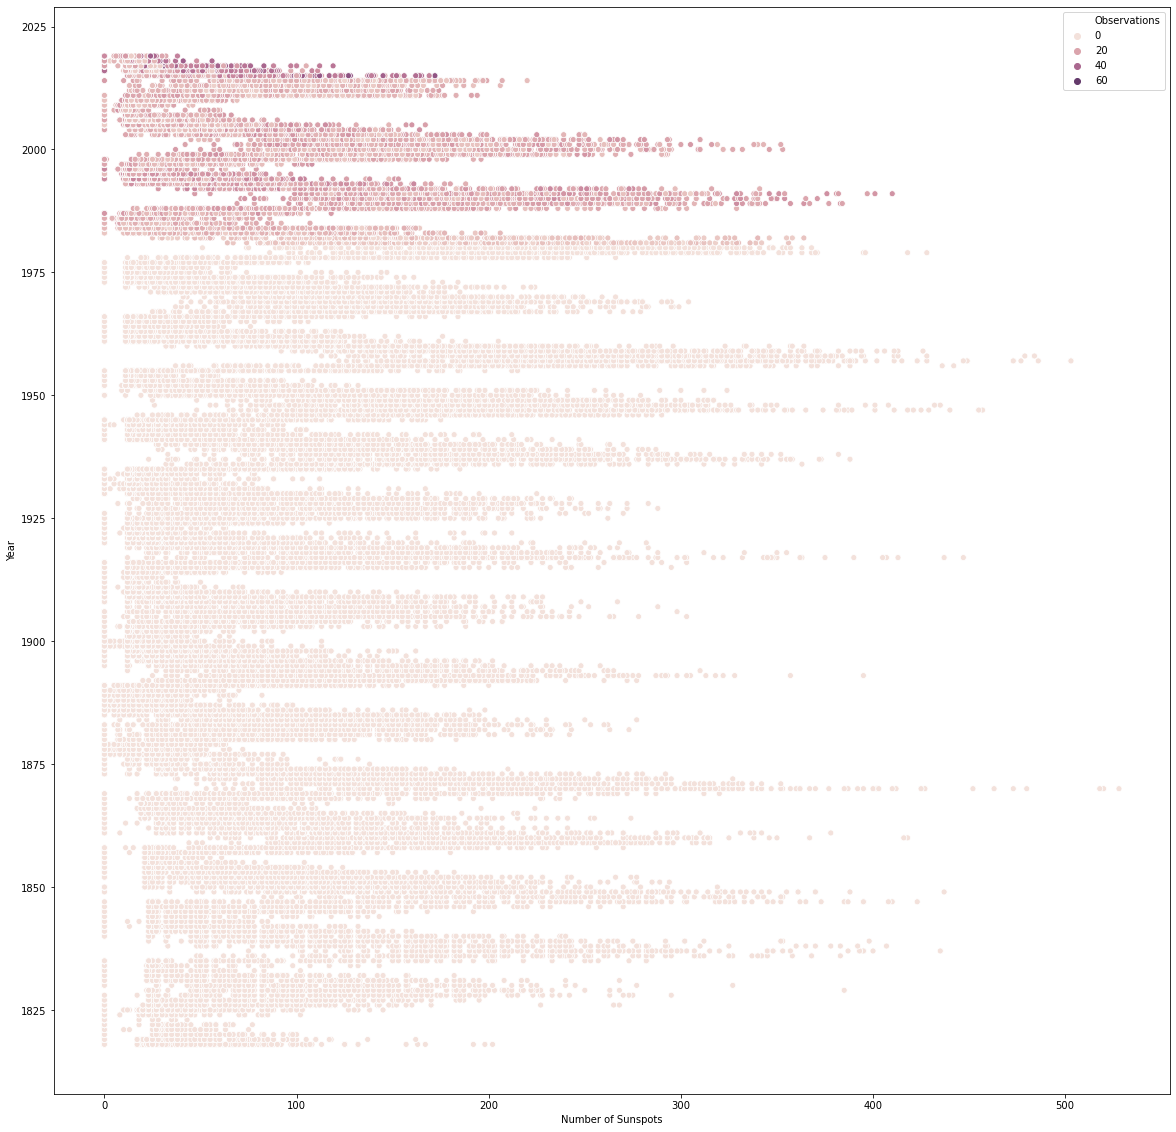

In [16]:
cmap = sns.cubehelix_palette(dark=.3, light=.9, as_cmap=True)
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x="Number of Sunspots", y="Year", hue="Observations", palette=cmap)
plt.show()

It's interesting ,because while the nums of observation increasing, observation of sunpots decreased.

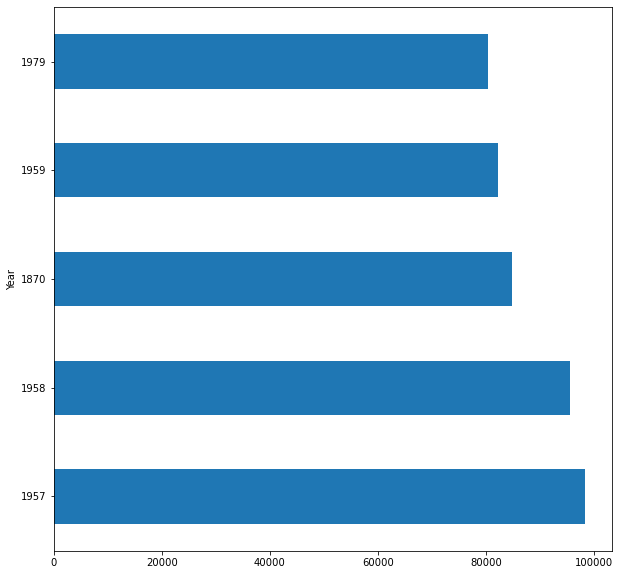

In [17]:
t['Number of Sunspots'].head(5).plot(kind='barh', figsize=(10,10))
yaxes="Number of Sunpots"

# Feature Engineering

In [18]:
dfcorr=df.corr()
dfcorr

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
Year,1.000000,-0.001386,0.003305,0.999987,0.064302,-0.293004,0.637660,-0.071440
Month,-0.001386,1.000000,0.008554,0.003660,0.003905,0.003890,-0.005003,-0.024177
Day,0.003305,0.008554,1.000000,0.003774,-0.000028,-0.002414,0.000263,-0.000795
Date In Fraction Of Year,0.999987,0.003660,0.003774,1.000000,0.064322,-0.292983,0.637629,-0.071561
Number of Sunspots,0.064302,0.003905,-0.000028,0.064322,1.000000,0.831973,-0.057121,0.044474
Standard Deviation,-0.293004,0.003890,-0.002414,-0.292983,0.831973,1.000000,-0.205721,0.066267
Observations,0.637660,-0.005003,0.000263,0.637629,-0.057121,-0.205721,1.000000,-0.148856
Indicator,-0.071440,-0.024177,-0.000795,-0.071561,0.044474,0.066267,-0.148856,1.000000


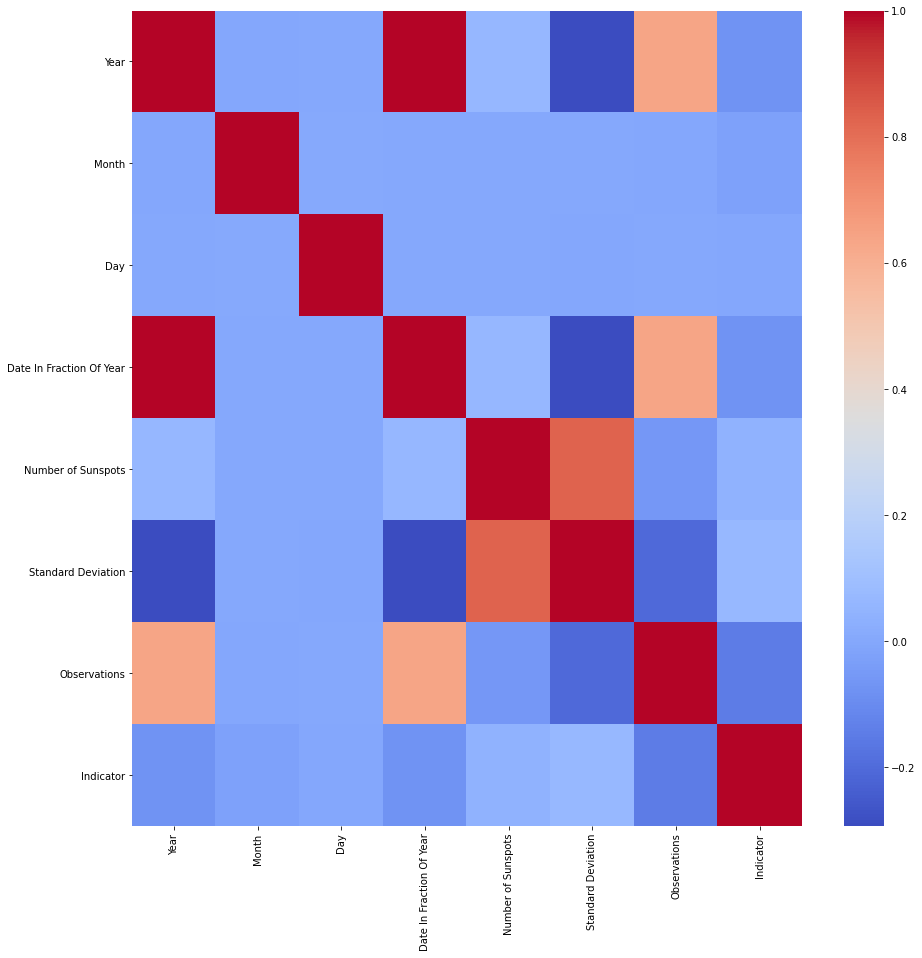

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(dfcorr, cmap='coolwarm')

In [20]:
df

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,8,1818.021,65.0,10.2,1,1
1,1818,1,13,1818.034,37.0,7.7,1,1
2,1818,1,17,1818.045,77.0,11.1,1,1
3,1818,1,18,1818.048,98.0,12.6,1,1
4,1818,1,19,1818.051,105.0,13.0,1,1
...,...,...,...,...,...,...,...,...
70466,2019,10,27,2019.821,0.0,0.0,34,0
70467,2019,10,28,2019.823,0.0,0.0,34,0
70468,2019,10,29,2019.826,0.0,0.0,30,0
70469,2019,10,30,2019.829,0.0,0.0,24,0


I analyzed the correlation matrix and after that I choosed most necessary columns for prediction to Sunspots num.

In [21]:
x = df.drop(["Number of Sunspots","Month","Day"],axis=1)

In [22]:
x

,Year,Date In Fraction Of Year,Standard Deviation,Observations,Indicator
0,1818,1818.021,10.2,1,1
1,1818,1818.034,7.7,1,1
2,1818,1818.045,11.1,1,1
3,1818,1818.048,12.6,1,1
4,1818,1818.051,13.0,1,1
...,...,...,...,...,...
70466,2019,2019.821,0.0,34,0
70467,2019,2019.823,0.0,34,0
70468,2019,2019.826,0.0,30,0
70469,2019,2019.829,0.0,24,0


In [23]:
y= df["Number of Sunspots"]
y=y.to_frame()
y

,Number of Sunspots
0,65.0
1,37.0
2,77.0
3,98.0
4,105.0
...,...
70466,0.0
70467,0.0
70468,0.0
70469,0.0


# Model Setup

# Split Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
x_train.shape

(52853, 5)

In [26]:
y_train.shape

(52853, 1)

# Model Choosing

### Neural Network 

In [27]:
from sklearn.neural_network import MLPRegressor
neu = MLPRegressor(random_state=1, max_iter=450).fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
df_new=pd.DataFrame(neu.predict(x_test))
pred_val= df_new.rename(columns={0: 'Number of Sunspots'})
pred_val

,Number of Sunspots
0,202.483245
1,57.053445
2,236.406690
3,91.170693
4,138.992551
...,...
17613,47.353932
17614,34.247948
17615,66.336576
17616,118.749255


In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("MLPRegressor's R2 Score:",r2_score(y_test, pred_val))

MLPRegressor's R2 Score: 0.7120555908393547


### Decision Trees

In [30]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

In [31]:
df_new=pd.DataFrame(clf.predict(x_test))
pred_val= df_new.rename(columns={0: 'Number of Sunspots'})
pred_val

,Number of Sunspots
0,87.0
1,49.0
2,207.0
3,19.0
4,295.0
...,...
17613,61.0
17614,23.0
17615,53.0
17616,14.0


In [32]:
print("Decision Tree Regressor's R2 Score:",r2_score(y_test, pred_val))

Decision Tree Regressor's R2 Score: 0.9548710181650378


In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

**After trials I choosed Decision Tree.**

# Performance Metrics

In [34]:
mean_absolute_error(y_test, pred_val)

4.994721307753434

In [35]:
pred_val.head(5)

,Number of Sunspots
0,87.0
1,49.0
2,207.0
3,19.0
4,295.0


In [36]:
y_test.head(5)

,Number of Sunspots
63187,194.0
69089,66.0
5165,207.0
57328,115.0
56191,296.0


# To_CSV

In [37]:
pred_val.to_csv('sunspotprediction.csv', index=False)